<a href="https://colab.research.google.com/github/skbhere/COVID-19-Case-Forecasting/blob/master/Foot_or_Not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
From google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [168]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import pandas as pd
import numpy as np

In [169]:
print(len(os.listdir('/content/drive/My Drive/data/foot or not/0foot/')))
print(len(os.listdir('/content/drive/My Drive/data/foot or not/not foot/')))

673
673


In [170]:
to_create = [
    '/content/drive/My Drive/data/foot or not/training',
    '/content/drive/My Drive/data/foot or not/testing',
    '/content/drive/My Drive/data/foot or not/training/0foot',
    '/content/drive/My Drive/data/foot or not/training/not_foot',
    '/content/drive/My Drive/data/foot or not/testing/0foot',
    '/content/drive/My Drive/data/foot or not/testing/not_foot'
]
for directory in to_create:
    try:
        os.mkdir(directory)
        print(directory, 'created')
    except:
        print(directory, 'failed')

/content/drive/My Drive/data/foot or not/training created
/content/drive/My Drive/data/foot or not/testing created
/content/drive/My Drive/data/foot or not/training/0foot created
/content/drive/My Drive/data/foot or not/training/not_foot created
/content/drive/My Drive/data/foot or not/testing/0foot created
/content/drive/My Drive/data/foot or not/testing/not_foot created


In [171]:

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    all_files = []
    
    for file_name in os.listdir(SOURCE):
        file_path = SOURCE + file_name

        if os.path.getsize(file_path):
            all_files.append(file_name)
        else:
            print('{} is zero length, so ignoring'.format(file_name))
    
    n_files = len(all_files)
    split_point = int(n_files * SPLIT_SIZE)
    
    shuffled = random.sample(all_files, n_files)
    
    train_set = shuffled[:split_point]
    test_set = shuffled[split_point:]
    
    for file_name in train_set:
        copyfile(SOURCE + file_name, TRAINING + file_name)
        
    for file_name in test_set:
        copyfile(SOURCE + file_name, TESTING + file_name)

FOOT_SOURCE_DIR = r"/content/drive/My Drive/data/foot or not/0foot/"
TRAINING_FOOT_DIR = r"/content/drive/My Drive/data/foot or not/training/0foot/"
TESTING_FOOT_DIR = r"/content/drive/My Drive/data/foot or not/testing/0foot/"
NOT_FOOT_SOURCE_DIR = r"/content/drive/My Drive/data/foot or not/not foot/"
TRAINING_NOT_FOOT_DIR = r"/content/drive/My Drive/data/foot or not/training/not_foot/"
TESTING_NOT_FOOT_DIR = r"/content/drive/My Drive/data/foot or not/testing/not_foot/"

split_size = .9
split_data(FOOT_SOURCE_DIR, TRAINING_FOOT_DIR, TESTING_FOOT_DIR, split_size)
split_data(NOT_FOOT_SOURCE_DIR, TRAINING_NOT_FOOT_DIR, TESTING_NOT_FOOT_DIR, split_size)

In [172]:
print(len(os.listdir('/content/drive/My Drive/data/foot or not/training/0foot/')))
print(len(os.listdir('/content/drive/My Drive/data/foot or not/training/not_foot/')))
print(len(os.listdir('/content/drive/My Drive/data/foot or not/testing/0foot/')))
print(len(os.listdir('/content/drive/My Drive/data/foot or not/testing/not_foot/')))

605
605
68
68


In [173]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer="Adamax", loss='binary_crossentropy', metrics=['acc'])


In [176]:
TRAINING_DIR = '/content/drive/My Drive/data/foot or not/training/'
train_datagen = ImageDataGenerator(
    rescale=1 / 255,
    rotation_range=40,
    width_shift_range=.2,
    height_shift_range=.2,
    shear_range=.2,
    zoom_range=.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=64,
    class_mode='binary',
    target_size=(150, 150)
)

VALIDATION_DIR = '/content/drive/My Drive/data/foot or not/testing/'
validation_datagen = ImageDataGenerator(
    rescale=1 / 255,
    rotation_range=40,
    width_shift_range=.2,
    height_shift_range=.2,
    shear_range=.2,
    zoom_range=.2,
    horizontal_flip=True,
    fill_mode='nearest'

)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size=64,
    class_mode='binary',
    target_size=(150, 150)
)

Found 264 images belonging to 2 classes.
Found 29 images belonging to 2 classes.


In [ ]:
import warnings
warnings.filterwarnings('ignore')
print('warnings ignored')

warnings ignored


In [177]:
history = model.fit_generator(
    train_generator,
    epochs=30,
    verbose=1,
    validation_data=validation_generator
)

Epoch 1/30
5/5 [==============================] - 8s 2s/step - loss: 1.1154 - acc: 0.5114 - val_loss: 0.8204 - val_acc: 0.2414
Epoch 2/30
5/5 [==============================] - 9s 2s/step - loss: 0.6664 - acc: 0.6250 - val_loss: 0.5915 - val_acc: 0.7586
Epoch 3/30
5/5 [==============================] - 6s 1s/step - loss: 0.6163 - acc: 0.7462 - val_loss: 0.6052 - val_acc: 0.7586
Epoch 4/30
5/5 [==============================] - 7s 1s/step - loss: 0.6149 - acc: 0.7462 - val_loss: 0.5738 - val_acc: 0.7586
Epoch 5/30
5/5 [==============================] - 9s 2s/step - loss: 0.5768 - acc: 0.7462 - val_loss: 0.5571 - val_acc: 0.7586
Epoch 6/30
5/5 [==============================] - 9s 2s/step - loss: 0.5549 - acc: 0.7462 - val_loss: 0.5427 - val_acc: 0.7586
Epoch 7/30
5/5 [==============================] - 7s 1s/step - loss: 0.5351 - acc: 0.7462 - val_loss: 0.5192 - val_acc: 0.7586
Epoch 8/30
5/5 [==============================] - 7s 1s/step - loss: 0.5178 - acc: 0.7462 - val_loss: 0.4875 - 

Text(0.5, 1.0, 'Training and validation loss')

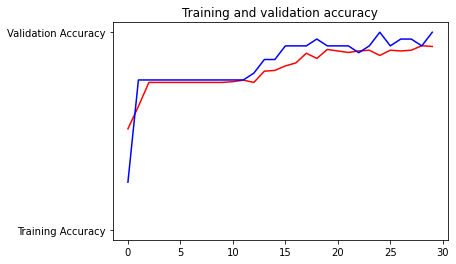

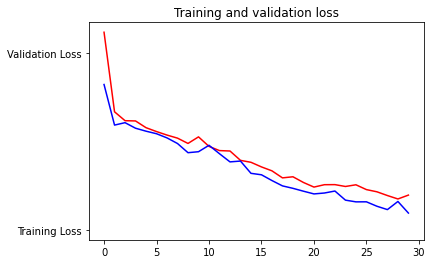

In [178]:

# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

In [187]:

# Here's a codeblock just for fun. You should be able to upload an image here 
# and have it classified without crashing

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
    # predicting images
    path = '/content/' + fn
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0][0])
    if classes[0][0]>0.5:
        print(fn + " is Foot")
    else:
        print(fn + " is not a Foot")

Saving foot-massage-1428388.jpg to foot-massage-1428388 (1).jpg
1.0
foot-massage-1428388.jpg is Foot
